<a href="https://colab.research.google.com/github/SKamara84/Weather_info/blob/main/Daily_LSTM81_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This analysis is for the prediction of a 5 year rainfall of Sierra Leone using Long-Short-Term_Memory (LSTM) model.

# LSTM Model: A Brief Overview

LSTMs are a type of recurrent neural network (RNN) that excel at handling time series data. Unlike traditional RNNs, LSTMs have a memory component that allows them to capture long-term dependencies in the data. This is particularly useful in rainfall prediction, where past patterns can significantly influence future rainfall.

# 1. Data loading and preprocessing
* Laoding libraries



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

* Load the Data: Load the Sierra Leone rainfall CSV data into a Pandas DataFrame.

In [2]:
import google.colab
from google.colab import data_table
data_table.enable_dataframe_formatter()

df = pd.read_csv("/content/DailRainfall_81_25.csv")

- Data Type Conversion: Convert 'time_start' to datetime and precipitation to numeric.

In [3]:
df['time_start'] = pd.to_datetime(df['time_start'])
df['precipitation'] = pd.to_numeric(df['precipitation'])

- Set Index: Set time_start as the index for time-series analysis.

In [4]:
df.set_index('time_start', inplace = True)

- Handle Missing Data (if any): We should check if there's missing data and impute it if necessary. In this case, we can replace it with 0 (if any).

In [5]:
df.fillna(0, inplace=True)  # Replace NaN values with 0, if there is any

- Data Normalization (Scaling): Scale rainfall data to a range between 0 and 1. Neural networks, including LSTMs, work best with scaled data. We'll use MinMaxScaler. This scaler remembers the original scale so we can invert the transform later.

In [6]:
scaler = MinMaxScaler()
df['precipitation'] = scaler.fit_transform(df['precipitation'].values.reshape(-1,1))

# 2. Prepare Data for LSTM
- Create Sequences: LSTMs need input in the form of sequences. We'll create sequences of a certain length (let's call it sequence_length) from our data. Each sequence will be the input and the next value will be the target.

In [9]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 30
X, y = create_sequences(df['precipitation'].values, sequence_length)


- Split Data into Training and Testing Sets: Divide our data into a training set (for learning) and a test set (for evaluating the model) using train_test_split function.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

- Reshape Input: Reshape the input to be a 3D tensor [samples, time steps, features], which is required by LSTMs. In our case, the number of features is 1 since we have only one value, precipitation.

In [10]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 3. Build the LSTM Model

- Define the LSTM Model: We create a sequential model with LSTM layers. We also add dropout layers to reduce overfitting, and Dense layer for a regression type output.

In [11]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(sequence_length, 1), return_sequences = True),
    Dropout(0.2),
    LSTM(units=50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(units = 1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- Compile the Model: Choose an optimizer, a loss function, and evaluation metrics. For regression problems, a good loss function is mean_squared_error.

In [12]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics = ['mse'])

# 4. Train the Model

- Fit the Model: Train the LSTM model on the prepared training data.

In [13]:
    model.fit(X_train, y_train, epochs=20, batch_size = 32, verbose = 1)

Epoch 1/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 0.0076 - mse: 0.0076
Epoch 2/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0070 - mse: 0.0070
Epoch 3/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0069 - mse: 0.0069
Epoch 4/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0067 - mse: 0.0067
Epoch 5/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0070 - mse: 0.0070
Epoch 6/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 0.0067 - mse: 0.0067
Epoch 7/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0067 - mse: 0.0067
Epoch 8/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0064 - mse: 0.0064
Epoch 9/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 0.0067 - mse: 0.0067
Epoch 10/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0065 - mse: 0.0065
Epoch 11/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0065 - mse: 0.0065
Epoch 12/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0065 - mse: 0.0065
E

# 5. Make Predictions

- Generate Forecast: we predict future rainfall values. We use the last sequence in the data to make the first prediction and append it. Then, append that value and create a rolling forecast where we drop the first element and include the prediction, thus using the latest data for the next prediction.

In [14]:
def forecast(model, last_sequence, steps, scaler):
    forecasts = []
    current_sequence = last_sequence.copy()
    for _ in range(steps):
         input_data = current_sequence.reshape((1, sequence_length, 1))
         prediction = model.predict(input_data)
         prediction_original_scale = scaler.inverse_transform(prediction)
         forecasts.append(prediction_original_scale[0][0])
         current_sequence = np.append(current_sequence[1:], prediction)
    return np.array(forecasts)

forecast_horizon = 5 * 365
last_sequence = X[-1]

predictions = forecast(model, last_sequence, forecast_horizon, scaler)

last_date = df.index[-1]
forecast_dates = pd.date_range(start = last_date + pd.Timedelta(days = 1), periods=forecast_horizon)
forecast_df = pd.DataFrame({
    'time_start': forecast_dates,
    'precipitation': predictions
})
forecast_df.set_index('time_start', inplace = True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

- Generate the time series for the forecasts.

In [15]:
last_date = df.index[-1]
forecast_dates = pd.date_range(start = last_date + pd.Timedelta(days = 1), periods=forecast_horizon)
forecast_df = pd.DataFrame({
    'time_start': forecast_dates,
    'precipitation': predictions
})
forecast_df.set_index('time_start', inplace = True)

# 6. Evaluate the Model:

- Make Predictions: Predict values of the test data set
python test_predictions = model.predict(X_test)

- Invert Scaling: Invert the scaling of test and predicted values so we can compute metrics

In [16]:
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


- Calculate Evaluation Metrics: We will evaluate the model using Mean Squared Error and R-squared.

In [17]:
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
print(f"Mean Squared Error on Test set: {mse}")
print(f"R-squared on Test set: {r2}")

Mean Squared Error on Test set: 69.32569032977923
R-squared on Test set: 0.31290883183761653


# 7. Visualization

- Plot the Actual vs. Predicted values for the test data set.

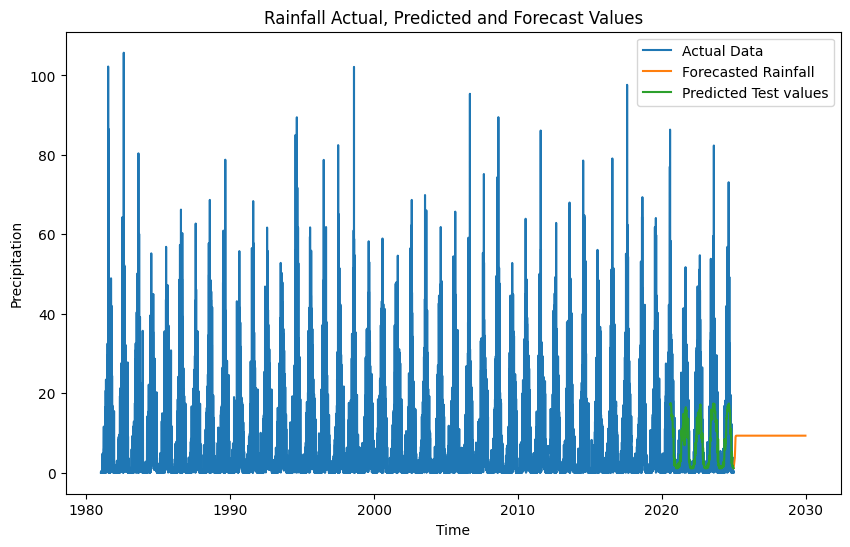

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, scaler.inverse_transform(df['precipitation'].values.reshape(-1, 1)), label='Actual Data')
test_set_start = df.index[-len(test_predictions)]
plt.plot(forecast_df.index, forecast_df['precipitation'], label = 'Forecasted Rainfall')
plt.plot(pd.date_range(start = test_set_start, periods=len(test_predictions)), test_predictions, label = 'Predicted Test values')
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.title("Rainfall Actual, Predicted and Forecast Values")
plt.legend()
plt.show()

Dataset Overview:
First few rows:
  time_start  precipitation
0 1981-01-01          0.000
1 1981-01-02          0.000
2 1981-01-03          0.000
3 1981-01-04          0.168
4 1981-01-05          0.230
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time_start     16071 non-null  datetime64[ns]
 1   precipitation  16071 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 251.2 KB
None
Basic Statistics:
                          time_start  precipitation
count                          16071   16071.000000
mean   2002-12-31 23:59:59.999999872       7.125109
min              1981-01-01 00:00:00       0.000000
25%              1992-01-01 12:00:00       0.140000
50%              2003-01-01 00:00:00       2.820000
75%              2013-12-31 12:00:00      10.090500
max              2024-12

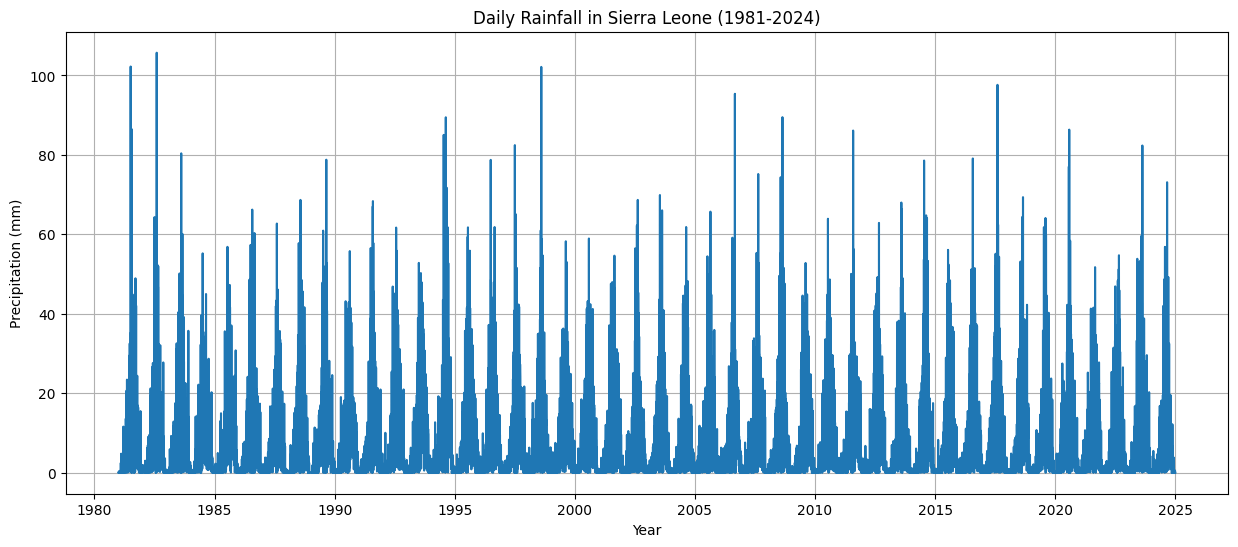

In [19]:
# J AI Code
import pandas as pd
import numpy as np
from datetime import datetime

# Read the CSV file
df = pd.read_csv('DailRainfall_81_25.csv')

# Convert time_start to datetime
df['time_start'] = pd.to_datetime(df['time_start'])

# Display basic information
print("Dataset Overview:")
print("\
First few rows:")
print(df.head())
print("\
Dataset Info:")
print(df.info())
print("\
Basic Statistics:")
print(df.describe())

# Create a simple time series plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(df['time_start'], df['precipitation'])
plt.title('Daily Rainfall in Sierra Leone (1981-2024)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()